# Weather with Folium 

In [1]:
import folium
from folium import plugins
import shapefile
import math

In [2]:
def convert_hrap_to_real_things(hrap_x,hrap_y):
    '''
        Pulled from 
    '''
    earthr=6371.2
    stlon=105.
    pi=3.141592654
    raddeg=180./pi
    xmesh=4.7625
    tlat=60./raddeg
    x=hrap_x-401.
    y=hrap_y-1601.
    rr=x*x+y*y
    gi=((earthr*(1. + math.sin(tlat)))/xmesh)
    gi=gi*gi
    rlat=math.asin((gi-rr)/(gi+rr))*raddeg
    #ang=math.atan2(y,x)*raddeg
    rlon = math.atan2(x,y)*raddeg
    #if(ang < 0.): 
    #    ang=ang+360.
    #rlon=270.0 + stlon - ang
    #if(rlon < -180):
    #    rlon=rlon+360.
    #if(rlon > 180.):
    #    rlon=rlon-360.
    
    return rlat, rlon 
        

In [3]:
# Read the data in
sf = shapefile.Reader("nws_precip_1day_observed_20160704.shx")

In [4]:
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['ID', 'N', 11, 0],
 ['HRAPX', 'N', 6, 0],
 ['HRAPY', 'N', 6, 0],
 ['LAT', 'N', 7, 4],
 ['LON', 'N', 9, 4],
 ['GLOBVALUE', 'N', 16, 2],
 ['UNITS', 'C', 32, 0]]

In [5]:
records = sf.records()

In [6]:
data = []

for line in records:
    #x,y = convert_hrap_to_real_things(line[3],line[4])
    data.append([ line[3], line[4], line[5]*25.4])

In [7]:
plugins.HeatMap

folium.plugins.heat_map.HeatMap

In [8]:
customColors = {0.0: 'white', 5.0/700.0: 'lime', 15.0/700.0: 'green', 50.0/700.0: 'red', 150.0/700.0: 'purple', 700.0/700.0: 'black'}

In [9]:
mapa = folium.Map([39.0119, -98.4842], tiles='stamentoner', zoom_start = 4)
#mapa = folium.Map([40.9257, -73.1409], tiles='stamentoner', zoom_start=5)
mapa.add_children(plugins.HeatMap(data)) #,  radius = 3, max_zoom = 0, blur = 0))#, gradient = customColors))#max_val = max(data[3][:])))
mapa

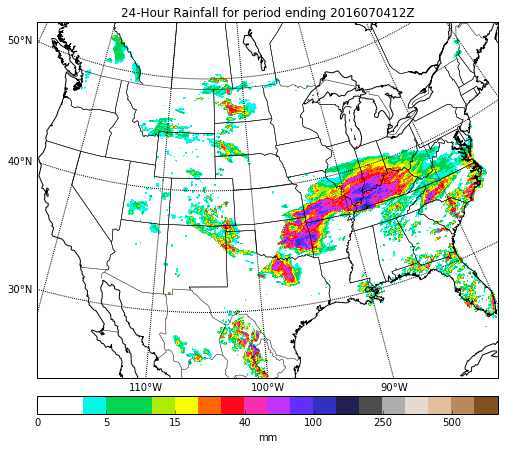

In [10]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt

# plot rainfall from NWS using special precipitation
# colormap used by the NWS, and included in basemap.

nc = NetCDFFile('nws_precip_conus_20160704.nc')
# data from http://water.weather.gov/precip/
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('mm')
# add title
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
plt.show()